In [67]:
# Managing Warings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import pandas as pd
import numpy as np

# Managing pandas display options
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from pandas.plotting import scatter_matrix

# Standard import
import math

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


# Set-up random seed so that results are reproducible
np.random.seed(42)
%matplotlib inline


In [2]:
#Read the data in pandas
ds1=pd.read_excel('AttributeDataSet.xlsx', index_col=0)
ds2=pd.read_excel('DressSales.xlsx', index_col=0)

In [3]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1006032852 to 919930954
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Price           498 non-null    object 
 2   Rating          500 non-null    float64
 3   Size            500 non-null    object 
 4   Season          498 non-null    object 
 5   NeckLine        497 non-null    object 
 6   SleeveLength    498 non-null    object 
 7   waiseline       413 non-null    object 
 8   Material        372 non-null    object 
 9   FabricType      234 non-null    object 
 10  Decoration      264 non-null    object 
 11  Pattern Type    391 non-null    object 
 12  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 54.7+ KB


In [4]:
ds1.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
Dress_ID,,,,,,,,,,,,,
1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [5]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1006032852 to 919930954
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Price           498 non-null    object 
 2   Rating          500 non-null    float64
 3   Size            500 non-null    object 
 4   Season          498 non-null    object 
 5   NeckLine        497 non-null    object 
 6   SleeveLength    498 non-null    object 
 7   waiseline       413 non-null    object 
 8   Material        372 non-null    object 
 9   FabricType      234 non-null    object 
 10  Decoration      264 non-null    object 
 11  Pattern Type    391 non-null    object 
 12  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 54.7+ KB


In [6]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1006032852 to 919930954
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2013-08-29  500 non-null    int64  
 1   2013-08-31  500 non-null    int64  
 2   2013-02-09  500 non-null    int64  
 3   2013-04-09  500 non-null    int64  
 4   2013-06-09  500 non-null    int64  
 5   2013-08-09  500 non-null    int64  
 6   2013-10-09  500 non-null    int64  
 7   2013-12-09  500 non-null    object 
 8   2013-09-14  500 non-null    object 
 9   2013-09-16  500 non-null    object 
 10  2013-09-18  500 non-null    object 
 11  2013-09-20  500 non-null    object 
 12  2013-09-22  500 non-null    object 
 13  2013-09-24  500 non-null    int64  
 14  2013-09-26  263 non-null    float64
 15  2013-09-28  500 non-null    int64  
 16  2013-09-30  227 non-null    float64
 17  2013-10-02  225 non-null    float64
 18  2013-10-04  226 non-null    float64
 19  2013-06-10  50

In [7]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
pd.unique(ds1['Size'])

array(['M', 'L', 'XL', 'free', 'S', 'small', 's'], dtype=object)

In [8]:
ds1['Size'].replace(['XL','L','M','S','s','small','free'], ['Extra Large','Large','Medium','Small','Small','Small','Free'], inplace=True)

In [9]:
pd.unique(ds1['Size'])

array(['Medium', 'Large', 'Extra Large', 'Free', 'Small'], dtype=object)

In [10]:
# Print the value counts of each category in "Size" column.
# What is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?

ds1['Size'].value_counts(normalize=True)*100

Medium         35.4
Free           34.6
Large          19.2
Small           7.8
Extra Large     3.0
Name: Size, dtype: float64

In [11]:
# Print the null count of each variables of ds1 and ds2.
ds1.isnull().sum()

Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [12]:
ds2.isnull().sum()

2013-08-29      0
2013-08-31      0
2013-02-09      0
2013-04-09      0
2013-06-09      0
2013-08-09      0
2013-10-09      0
2013-12-09      0
2013-09-14      0
2013-09-16      0
2013-09-18      0
2013-09-20      0
2013-09-22      0
2013-09-24      0
2013-09-26    237
2013-09-28      0
2013-09-30    273
2013-10-02    275
2013-10-04    274
2013-06-10      0
2010-10-08    271
2013-10-10    271
2013-12-10      0
dtype: int64

In [13]:
# Print the data types information of ds2 i.e. "Dress Sales" data.
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1006032852 to 919930954
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2013-08-29  500 non-null    int64  
 1   2013-08-31  500 non-null    int64  
 2   2013-02-09  500 non-null    int64  
 3   2013-04-09  500 non-null    int64  
 4   2013-06-09  500 non-null    int64  
 5   2013-08-09  500 non-null    int64  
 6   2013-10-09  500 non-null    int64  
 7   2013-12-09  500 non-null    object 
 8   2013-09-14  500 non-null    object 
 9   2013-09-16  500 non-null    object 
 10  2013-09-18  500 non-null    object 
 11  2013-09-20  500 non-null    object 
 12  2013-09-22  500 non-null    object 
 13  2013-09-24  500 non-null    int64  
 14  2013-09-26  263 non-null    float64
 15  2013-09-28  500 non-null    int64  
 16  2013-09-30  227 non-null    float64
 17  2013-10-02  225 non-null    float64
 18  2013-10-04  226 non-null    float64
 19  2013-06-10  50

In [14]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
##ds2['2013-09-12'] = pd.to_numeric(ds2['2013-09-12'])

In [15]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
ds2.loc[ds2['2013-12-09']== 'Removed',"2013-12-09"] = np.NaN
ds2.loc[ds2['2013-09-14']== 'removed',"2013-09-14"] = np.NaN
ds2.loc[ds2['2013-09-16']== 'removed',"2013-09-16"] = np.NaN
ds2.loc[ds2['2013-09-18']== 'removed',"2013-09-18"] = np.NaN
ds2.loc[ds2['2013-09-20']== 'removed',"2013-09-20"] = np.NaN
ds2.loc[ds2['2013-09-22']== 'Orders',"2013-09-22"] = np.NaN


In [16]:
ds2['2013-12-09'] = pd.to_numeric(ds2['2013-12-09'], downcast='float')
ds2['2013-09-14'] = pd.to_numeric(ds2['2013-09-14'], downcast='float')
ds2['2013-09-16'] = pd.to_numeric(ds2['2013-09-16'], downcast='float')
ds2['2013-09-18'] = pd.to_numeric(ds2['2013-09-18'], downcast='float')
ds2['2013-09-20'] = pd.to_numeric(ds2['2013-09-20'], downcast='float')
ds2['2013-09-22'] = pd.to_numeric(ds2['2013-09-22'], downcast='float')

In [17]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1006032852 to 919930954
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2013-08-29  500 non-null    int64  
 1   2013-08-31  500 non-null    int64  
 2   2013-02-09  500 non-null    int64  
 3   2013-04-09  500 non-null    int64  
 4   2013-06-09  500 non-null    int64  
 5   2013-08-09  500 non-null    int64  
 6   2013-10-09  500 non-null    int64  
 7   2013-12-09  499 non-null    float32
 8   2013-09-14  499 non-null    float32
 9   2013-09-16  499 non-null    float32
 10  2013-09-18  499 non-null    float32
 11  2013-09-20  499 non-null    float32
 12  2013-09-22  499 non-null    float32
 13  2013-09-24  500 non-null    int64  
 14  2013-09-26  263 non-null    float64
 15  2013-09-28  500 non-null    int64  
 16  2013-09-30  227 non-null    float64
 17  2013-10-02  225 non-null    float64
 18  2013-10-04  226 non-null    float64
 19  2013-06-10  50

In [18]:
# Print the null percetange of each column of ds2.
ds2.isnull().sum()/len(ds2.index)*100

2013-08-29     0.0
2013-08-31     0.0
2013-02-09     0.0
2013-04-09     0.0
2013-06-09     0.0
2013-08-09     0.0
2013-10-09     0.0
2013-12-09     0.2
2013-09-14     0.2
2013-09-16     0.2
2013-09-18     0.2
2013-09-20     0.2
2013-09-22     0.2
2013-09-24     0.0
2013-09-26    47.4
2013-09-28     0.0
2013-09-30    54.6
2013-10-02    55.0
2013-10-04    54.8
2013-06-10     0.0
2010-10-08    54.2
2013-10-10    54.2
2013-12-10     0.0
dtype: float64

In [19]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
ds2 = ds2.drop(['2013-09-26','2013-09-30','2013-10-02','2013-10-04','2010-10-08','2013-10-10' ],axis=1)
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1006032852 to 919930954
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2013-08-29  500 non-null    int64  
 1   2013-08-31  500 non-null    int64  
 2   2013-02-09  500 non-null    int64  
 3   2013-04-09  500 non-null    int64  
 4   2013-06-09  500 non-null    int64  
 5   2013-08-09  500 non-null    int64  
 6   2013-10-09  500 non-null    int64  
 7   2013-12-09  499 non-null    float32
 8   2013-09-14  499 non-null    float32
 9   2013-09-16  499 non-null    float32
 10  2013-09-18  499 non-null    float32
 11  2013-09-20  499 non-null    float32
 12  2013-09-22  499 non-null    float32
 13  2013-09-24  500 non-null    int64  
 14  2013-09-28  500 non-null    int64  
 15  2013-06-10  500 non-null    int64  
 16  2013-12-10  500 non-null    int64  
dtypes: float32(6), int64(11)
memory usage: 58.6 KB


In [20]:
ds2.isnull().sum()/len(ds2.index)*100

2013-08-29    0.0
2013-08-31    0.0
2013-02-09    0.0
2013-04-09    0.0
2013-06-09    0.0
2013-08-09    0.0
2013-10-09    0.0
2013-12-09    0.2
2013-09-14    0.2
2013-09-16    0.2
2013-09-18    0.2
2013-09-20    0.2
2013-09-22    0.2
2013-09-24    0.0
2013-09-28    0.0
2013-06-10    0.0
2013-12-10    0.0
dtype: float64

In [21]:
ds2.head()

,2013-08-29,2013-08-31,2013-02-09,2013-04-09,2013-06-09,2013-08-09,2013-10-09,2013-12-09,2013-09-14,2013-09-16,2013-09-18,2013-09-20,2013-09-22,2013-09-24,2013-09-28,2013-06-10,2013-12-10
Dress_ID,,,,,,,,,,,,,,,,,
1006032852,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3706,3897,4048
1212192089,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,3258,3911,4277
1190380701,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11,11,11
966005983,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1914,1952,1963
876339541,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2252,2544,2736


In [22]:
# Create the four seasons columns in ds2, according to the above criteria.
ds2['Summer'] = ds2['2013-06-09'] + ds2['2013-06-10'] + ds2['2013-08-29'] + ds2['2013-08-31'] + ds2['2013-08-09'] 
ds2['Autumn'] = ds2['2013-10-09'] + ds2['2013-09-14'] + ds2['2013-09-16'] + ds2['2013-09-18'] + ds2['2013-09-20'] + ds2['2013-09-22'] + ds2['2013-09-24'] + ds2['2013-09-28']
ds2['Winter'] = ds2['2013-12-09'] + ds2['2013-12-10'] + ds2['2013-02-09'] 
ds2['Spring'] = ds2['2013-04-09']

In [23]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
ds2[['Summer','Autumn','Winter','Spring']].sum()

Summer     711176.0
Autumn    1406481.0
Winter     487533.0
Spring     149336.0
dtype: float64

In [24]:
# Merge ds1 with inp1 into ds1. this is also called left merge.
ds1 = pd.merge(left=ds1,right=ds2, how='left', left_on='Dress_ID', right_on='Dress_ID')
ds1.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,...,2013-09-20,2013-09-22,2013-09-24,2013-09-28,2013-06-10,2013-12-10,Summer,Autumn,Winter,Spring
Dress_ID,,,,,,,,,,,,,,,,,,,,,
1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,empire,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,natural,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
1190380701,vintage,High,0.0,Large,Automn,o-neck,full,natural,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
966005983,Brief,Average,4.6,Large,Spring,o-neck,full,natural,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [25]:
# Now Drop the Date columns from ds1 as it is already combined into four seasons.
ds1.drop(ds1.loc[:,'2013-08-29':'2013-12-10'].columns, axis= 1, inplace= True)

In [26]:
# Print the null count of each columns in ds1 dataframe i.e. combined data frame of ds1 and inp1 without date columns.
ds1.isnull().sum()

Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          92
Material          147
FabricType        292
Decoration        266
Pattern Type      119
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

In [27]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
ds1['Price'].fillna(ds1['Price'].mode(), inplace=True)
ds1['Season'].fillna(ds1['Season'].mode(), inplace=True)
ds1['NeckLine'].fillna(ds1['NeckLine'].mode(), inplace=True)
ds1['SleeveLength'].fillna(ds1['SleeveLength'].mode(), inplace=True)
ds1['Winter'].fillna(ds1['Winter'].mode(), inplace=True)
ds1['Autumn'].fillna(ds1['Autumn'].mode(), inplace=True)

In [28]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
ds1.dropna(axis=0, subset=['Material','FabricType','Decoration','Pattern Type'], inplace=True)
ds1.isnull().sum()

Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
waiseline         4
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Summer            0
Autumn            1
Winter            0
Spring            0
dtype: int64

In [29]:
#correcting the spellings.
ds1['Season'].unique()

array(['Spring', 'Summer', 'Automn', 'Winter', 'winter', 'Autumn'],
      dtype=object)

In [30]:
ds1['Season'].replace(['Automn','winter'], ['Autumn','Winter'], inplace=True)
ds1['Season'].unique()

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [31]:
ds1['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'threequarter', 'thressqatar'], dtype=object)

In [32]:
ds1['SleeveLength'].replace(['thressqatar'], ['threequarter'], inplace=True)
ds1['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'threequarter'], dtype=object)

In [33]:
ds1.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring
Dress_ID,,,,,,,,,,,,,,,,,
966005983,Brief,Average,4.6,Large,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455
876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396
1113094204,Flare,Average,0.0,Free,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid,1,68,181.0,60.0,12
1117293701,party,Average,5.0,Free,Summer,o-neck,full,natural,polyster,broadcloth,lace,solid,0,275,624.0,245.0,49
942808364,cute,Low,4.3,Free,Autumn,o-neck,sleevless,natural,polyster,chiffon,sashes,striped,0,2288,4073.0,1497.0,475


In [34]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
ds1['total'] = ds1['Summer'] + ds1['Autumn'] + ds1['Winter'] + ds1['Spring']
style_group = ds1['total'].groupby(ds1['Style']).sum().reset_index()
res = style_group.loc[style_group['total']<50000]
res

,Style,total
2,Flare,321.0
3,Novelty,5728.0
5,bohemian,18463.0
7,party,27303.0
8,sexy,11403.0
9,vintage,9769.0
10,work,21837.0


In [35]:
ds1['Style'].replace(['Flare','Novelty','bohemian','party','party','sexy','vintage','work'], 'Others', inplace=True)
ds1['Style'].unique()

array(['Brief', 'cute', 'Others', 'Casual', 'Sexy'], dtype=object)

In [36]:
# Calculate the percentage of each categories in the "Style" variable.
ds1['Style'].value_counts(normalize=True)*100

Casual    44.444444
cute      21.296296
Others    18.518519
Sexy      12.037037
Brief      3.703704
Name: Style, dtype: float64

In [37]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
neck_group = ds1['total'].groupby(ds1['NeckLine']).sum().reset_index()
res = neck_group.loc[neck_group['total']<50000]
res

,NeckLine,total
0,Sweetheart,3499.0
1,boat-neck,4322.0
2,bowneck,2560.0
4,open,705.0
5,peterpan-collor,13420.0
7,slash-neck,10510.0
8,turndowncollor,2854.0


In [38]:
ds1['NeckLine'].replace(['Sweetheart','boart-neck','bowneck','open','peterpan-collor','slash-neck','turndowncollor'], 'Others', inplace=True)
ds1['NeckLine'].unique()

array(['o-neck', 'v-neck', 'ruffled', 'boat-neck', 'Others'], dtype=object)

In [39]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
sleeve_group = ds1['total'].groupby(ds1['SleeveLength']).sum().reset_index()
res = sleeve_group.loc[sleeve_group['total']<50000]
res

,SleeveLength,total
0,butterfly,29456.0
5,threequarter,12607.0


In [40]:
ds1['SleeveLength'].replace(['butterfly','threequarter'], 'Others', inplace=True)
ds1['SleeveLength'].unique()

array(['full', 'Others', 'short', 'sleevless', 'halfsleeve'], dtype=object)

In [41]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
mat_group = ds1['total'].groupby(ds1['Material']).sum().reset_index()
res = mat_group.loc[mat_group['total']<25000]
res

,Material,total
2,linen,17098.0
3,lycra,12517.0
5,model,245.0
6,nylon,429.0
7,other,4207.0
10,shiffon,11166.0
12,spandex,18463.0


In [42]:
ds1['Material'].replace(['linen','lycra','model','nylon','other','shiffon','spandex'], 'Others', inplace=True)
ds1['Material'].unique()

array(['silk', 'chiffonfabric', 'cotton', 'polyster', 'Others', 'rayon',
       'mix'], dtype=object)

In [43]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
fab_group = ds1['total'].groupby(ds1['FabricType']).sum().reset_index()
res = fab_group.loc[fab_group['total']<25000]
res

,FabricType,total
0,Corduroy,8387.0
4,poplin,705.0
5,satin,11403.0
6,sattin,1826.0
7,shiffon,11642.0
8,terry,373.0
9,tulle,2102.0
10,wollen,2858.0
11,woolen,0.0


In [44]:
res['FabricType']

0     Corduroy
4       poplin
5        satin
6       sattin
7      shiffon
8        terry
9        tulle
10      wollen
11      woolen
Name: FabricType, dtype: object

In [45]:
ds1['Material'].replace(['Corduroy','poplin','sattin','shiffon','terry','tulle','wollen','woolen'], 'Others', inplace=True)
ds1['Material'].unique()

array(['silk', 'chiffonfabric', 'cotton', 'polyster', 'Others', 'rayon',
       'mix'], dtype=object)

In [46]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
pat_group = ds1['total'].groupby(ds1['Pattern Type']).sum().reset_index()
res = pat_group.loc[pat_group['total']<25000]
res

,Pattern Type,total
0,animal,20270.0
2,geometric,5632.0
6,striped,15548.0


In [47]:
ds1['Pattern Type'].replace(['animal','geometric','striped'], 'Others', inplace=True)
ds1['Pattern Type'].unique()

array(['print', 'dot', 'solid', 'Others', 'patchwork'], dtype=object)

In [48]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
dec_group = ds1['total'].groupby(ds1['Decoration']).sum().reset_index()
res = dec_group.loc[dec_group['total']<25000]
res

,Decoration,total
3,cascading,210.0
4,draped,4744.0
6,feathers,36.0
9,none,7743.0
10,plain,245.0
11,pockets,4046.0
12,ruched,7940.0
15,sequined,5100.0
16,tassel,939.0


In [49]:
ds1['Decoration'].replace(['cascading','draped','feathers','none','plain','pockets','ruched','sequined','tassel'], 'Others', inplace=True)
ds1['Decoration'].unique()

array(['embroidary', 'bow', 'beading', 'lace', 'sashes', 'ruffles',
       'applique', 'hollowout', 'Others'], dtype=object)

In [50]:
ds1.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,total
Dress_ID,,,,,,,,,,,,,,,,,,
966005983,Brief,Average,4.6,Large,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455,28091.0
876339541,cute,Low,4.5,Medium,Summer,o-neck,Others,natural,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396,29456.0
1113094204,Others,Average,0.0,Free,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid,1,68,181.0,60.0,12,321.0
1117293701,Others,Average,5.0,Free,Summer,o-neck,full,natural,polyster,broadcloth,lace,solid,0,275,624.0,245.0,49,1193.0
942808364,cute,Low,4.3,Free,Autumn,o-neck,sleevless,natural,polyster,chiffon,sashes,Others,0,2288,4073.0,1497.0,475,8333.0


In [51]:
x = ds1['Autumn'].max() - ds1['Autumn'].quantile(0.75)
x

51823.0

In [52]:
# Describe the numerical variale: "Autumn".
ds1['Autumn'].describe()

count      107.000000
mean      3606.514019
std       6612.501390
min          1.000000
25%        531.000000
50%       1631.000000
75%       3709.000000
max      55532.000000
Name: Autumn, dtype: float64

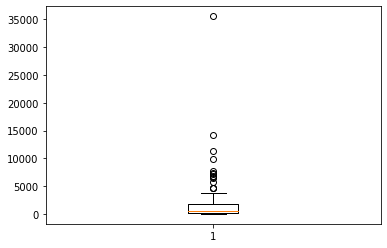

In [53]:
# plot the boxplot of "Autumn" column.
plt.boxplot(ds1['Summer'])
plt.show()

In [54]:
# Find the maximum and 99th percentile of Winter season.
print(ds1['Winter'].max()) 
print(ds1['Winter'].quantile(0.99))

x = ds1['Winter'].max() - ds1['Winter'].quantile(0.99)
x

20388.0
8544.889999999985


11843.110000000015

In [55]:
# Find the maximum and 99th percentile of Summer season.
print(ds1['Summer'].max()) 
print(ds1['Summer'].quantile(0.99))
x = ds1['Summer'].max() - ds1['Summer'].quantile(0.99)
x

35577
13946.769999999979


21630.23000000002

In [56]:
# Find the maximum and 99th percentile of Spring season.
print(ds1['Spring'].max()) 
print(ds1['Spring'].quantile(0.99))
x = ds1['Spring'].max() - ds1['Spring'].quantile(0.99)
x

7374
2811.3099999999968


4562.690000000003

In [57]:
# Find the maximum and 99th percentile of Autumn season.
print(ds1['Autumn'].max()) 
print(ds1['Autumn'].quantile(0.99))

x = ds1['Autumn'].max() - ds1['Autumn'].quantile(0.99)
x

55532.0
23159.419999999987


32372.580000000013

In [58]:
# Find the Mean of Ratings for each Price category.
ds1['Rating'].groupby(ds1['Price']).mean()

Price
Average    3.170588
High       0.000000
Low        4.052632
Medium     3.328571
high       4.300000
low        4.090000
Name: Rating, dtype: float64

In [59]:
# Find the median of Ratings for each Style category.
ds1['Rating'].groupby(ds1['Style']).median()

Style
Brief     4.5
Casual    4.6
Others    4.6
Sexy      4.4
cute      4.6
Name: Rating, dtype: float64

In [60]:
ds1['Recommendation'].groupby(ds1['Season']).mean()

Season
Autumn    0.117647
Spring    0.666667
Summer    0.275862
Winter    0.379310
Name: Recommendation, dtype: float64

In [61]:
# Size vs Recommendation.
ds1.groupby('Size')['Recommendation'].sum()

Size
Extra Large     2
Free           18
Large           9
Medium         14
Small           0
Name: Recommendation, dtype: int64

In [62]:
# plot the heat map of Style, price and Recommendation.
res = pd.pivot_table(data=ds1, index='Style', columns='Price', values='Recommendation')
res

Price,Average,High,Low,Medium,high,low
Style,,,,,,
Brief,1.000000,NaN,0.000000,NaN,NaN,NaN
Casual,0.375000,NaN,0.210526,0.5,NaN,0.000000
Others,0.230769,NaN,0.750000,1.0,NaN,0.500000
Sexy,0.500000,NaN,0.250000,0.0,NaN,0.500000
cute,0.571429,0.0,0.500000,1.0,1.0,0.333333


<AxesSubplot:xlabel='Price', ylabel='Style'>

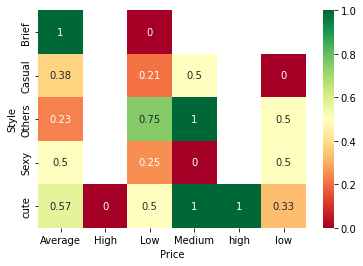

In [63]:
sns.heatmap(res, cmap='RdYlGn', annot=True)

<AxesSubplot:xlabel='Season', ylabel='Material'>

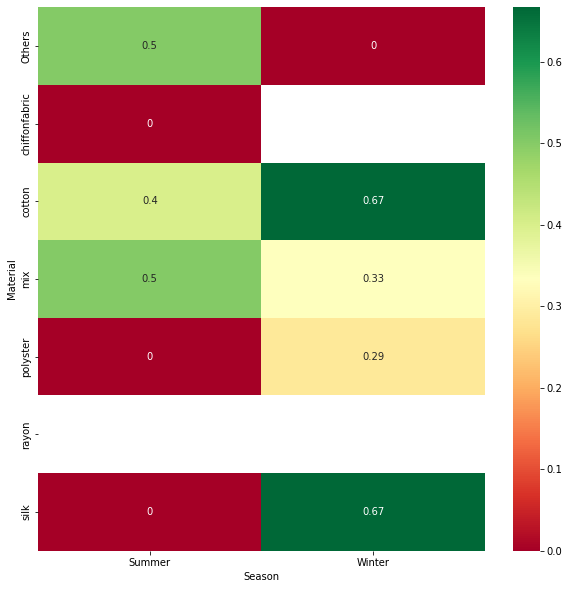

In [64]:
# plot the heat map of Season, material and Recommendation.
res = pd.pivot_table(data=ds1, index='Material', columns='Season', values='Recommendation')
plt.figure(figsize=[10,10])
sns.heatmap(res[['Summer','Winter']], cmap='RdYlGn', annot=True)

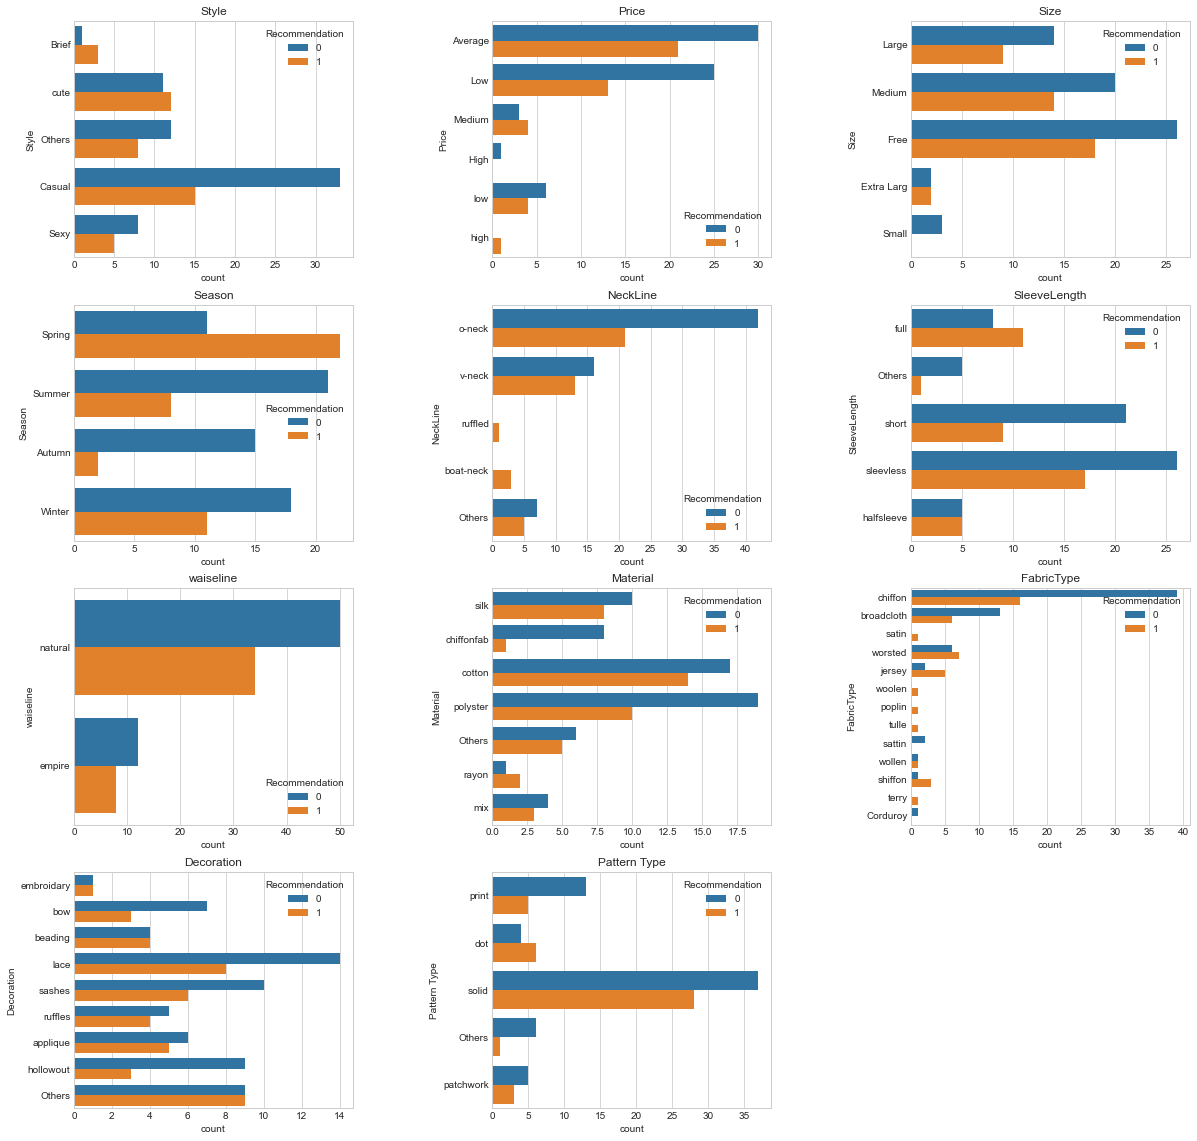

In [68]:
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=20, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
plot_bivariate_bar(ds1, hue=ds1['Recommendation'], cols=3)

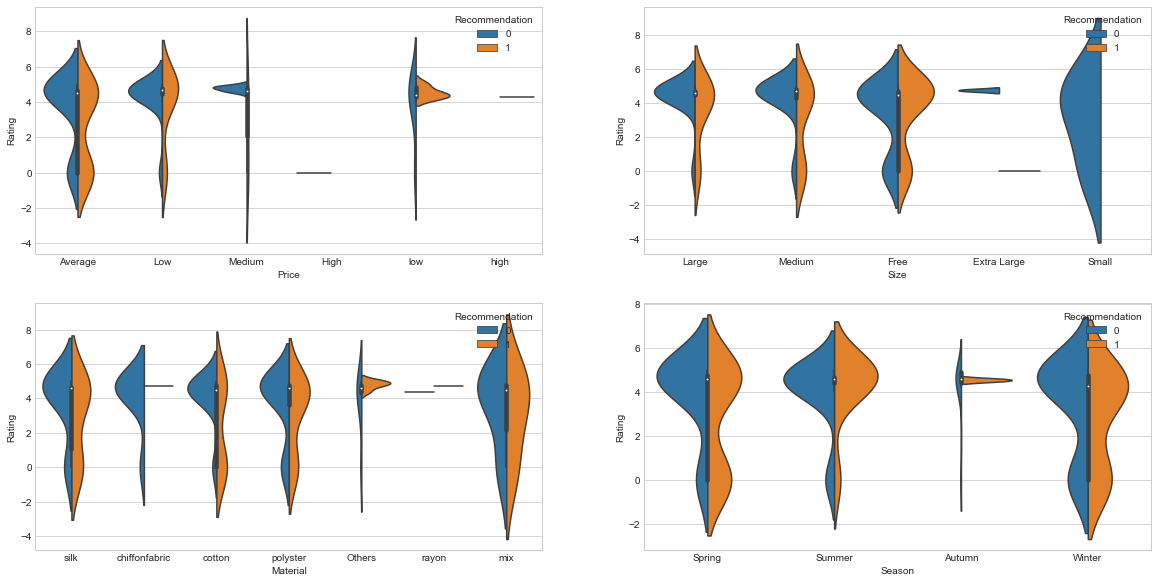

In [69]:
# Historical Trends on the Price, Rating, Size, Material and Season impact on Recommendation.
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.violinplot(x='Price', y='Rating', data=ds1, hue='Recommendation', split=True, ax=ax1);
sns.violinplot(x='Size', y='Rating', data=ds1, hue='Recommendation', split=True, ax=ax2);
sns.violinplot(x='Material', y='Rating', data=ds1, hue='Recommendation', split=True, ax=ax3);
sns.violinplot(x='Season', y='Rating', data=ds1, hue='Recommendation', split=True, ax=ax4);

In [72]:
# One Hot Encodes all labels before Machine Learning
one_hot_cols = ds1.columns.tolist()
one_hot_cols.remove('Recommendation')
df_one_hot = pd.get_dummies(ds1, columns=one_hot_cols, drop_first=True)

df_one_hot.head()

,Recommendation,Style_Casual,Style_Others,Style_Sexy,Style_cute,Price_High,Price_Low,Price_Medium,Price_high,Price_low,...,total_21772.0,total_24713.0,total_24943.0,total_25741.0,total_28091.0,total_29456.0,total_34651.0,total_38251.0,total_49173.0,total_118871.0
Dress_ID,,,,,,,,,,,,,,,,,,,,,
966005983,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
876339541,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1113094204,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117293701,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942808364,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Label Encode all labels
df_label_encode = ds1.apply(LabelEncoder().fit_transform)
df_label_encode.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,total
Dress_ID,,,,,,,,,,,,,,,,,,
966005983,0,0,7,2,1,2,1,1,6,2,4,3,1,92,96,95,86,95
876339541,4,2,6,3,2,2,0,1,1,2,3,1,0,94,97,96,84,96
1113094204,2,0,0,1,1,4,3,0,2,1,2,4,1,9,12,11,6,11
1117293701,2,0,11,1,2,2,1,1,4,1,6,4,0,30,31,34,24,31
942808364,4,2,4,1,0,2,4,1,4,2,8,0,0,79,79,78,69,78


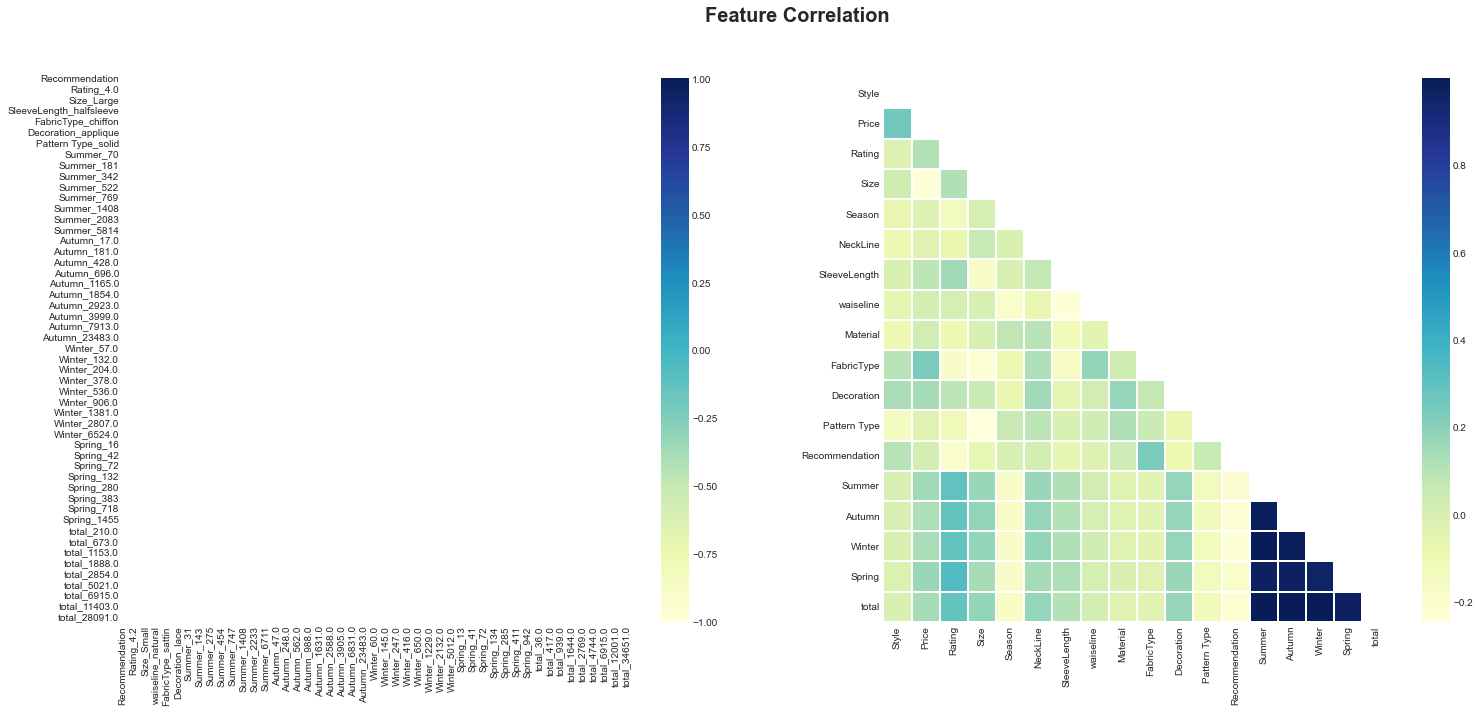

In [74]:
# Flot feature Corelation
fig, (ax1, ax2) = plt.subplots(figsize=(25, 10), nrows=1, ncols=2)

# One hot encoded dataframe
mask = np.zeros_like(df_one_hot.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_one_hot.corr(), ax=ax1, linewidths=0.1, cmap='YlGnBu',vmax=1, vmin=-1, mask=mask);

# Label Encoded Dataframe
mask = np.zeros_like(df_label_encode.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_label_encode.corr(), ax=ax2, linewidths=0.1, cmap='YlGnBu', mask=mask);

fig.suptitle('Feature Correlation', fontsize=(20), fontweight='bold');

In [76]:
# Getting our independent and dependent variables
X = df_one_hot.drop('Recommendation', axis=1)
y = ds1['Recommendation']

In [77]:
# Check the dimensions
X.shape, y.shape

((108, 555), (108,))

In [78]:
X.head(10)

,Style_Casual,Style_Others,Style_Sexy,Style_cute,Price_High,Price_Low,Price_Medium,Price_high,Price_low,Rating_3.6,...,total_21772.0,total_24713.0,total_24943.0,total_25741.0,total_28091.0,total_29456.0,total_34651.0,total_38251.0,total_49173.0,total_118871.0
Dress_ID,,,,,,,,,,,,,,,,,,,,,
966005983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
876339541,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1113094204,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117293701,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942808364,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629131530,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
851945460,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1150275464,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026634314,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
y.head(10)


Dress_ID
966005983     1
876339541     0
1113094204    1
1117293701    0
942808364     0
629131530     1
851945460     0
1150275464    1
1026634314    0
943844640     1
Name: Recommendation, dtype: int64

In [80]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [124]:
train, test = train_test_split(ds1, test_size=0.2, random_state=42)

In [126]:
# train.to_csv('train.csv')
# test.to_csv('test.csv')

In [121]:
# Check the dimesions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(86, 555) (86,)
(22, 555) (22,)


<AxesSubplot:>

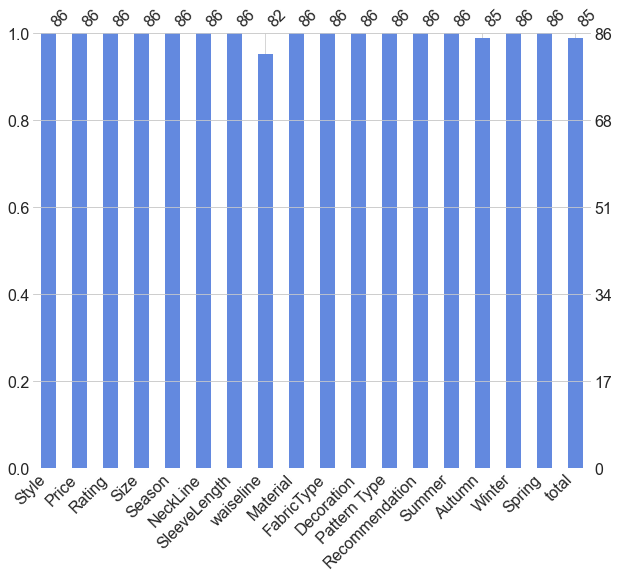

In [127]:
#Using missingno to visualize null values in train data
import missingno as msno
msno.bar(train, color = '#6389df', figsize = (10,8))  

<AxesSubplot:>

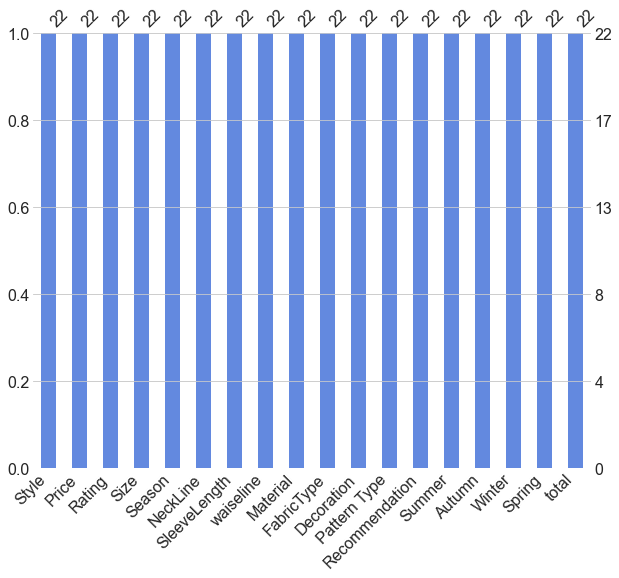

In [128]:
#Using missingno to visualize null values in test data
msno.bar(test, color = '#6389df', figsize = (10,8))  

<AxesSubplot:>

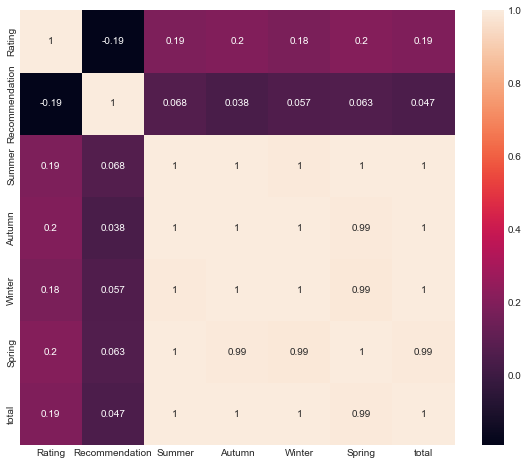

In [129]:
corr=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,square=True,annot=True)

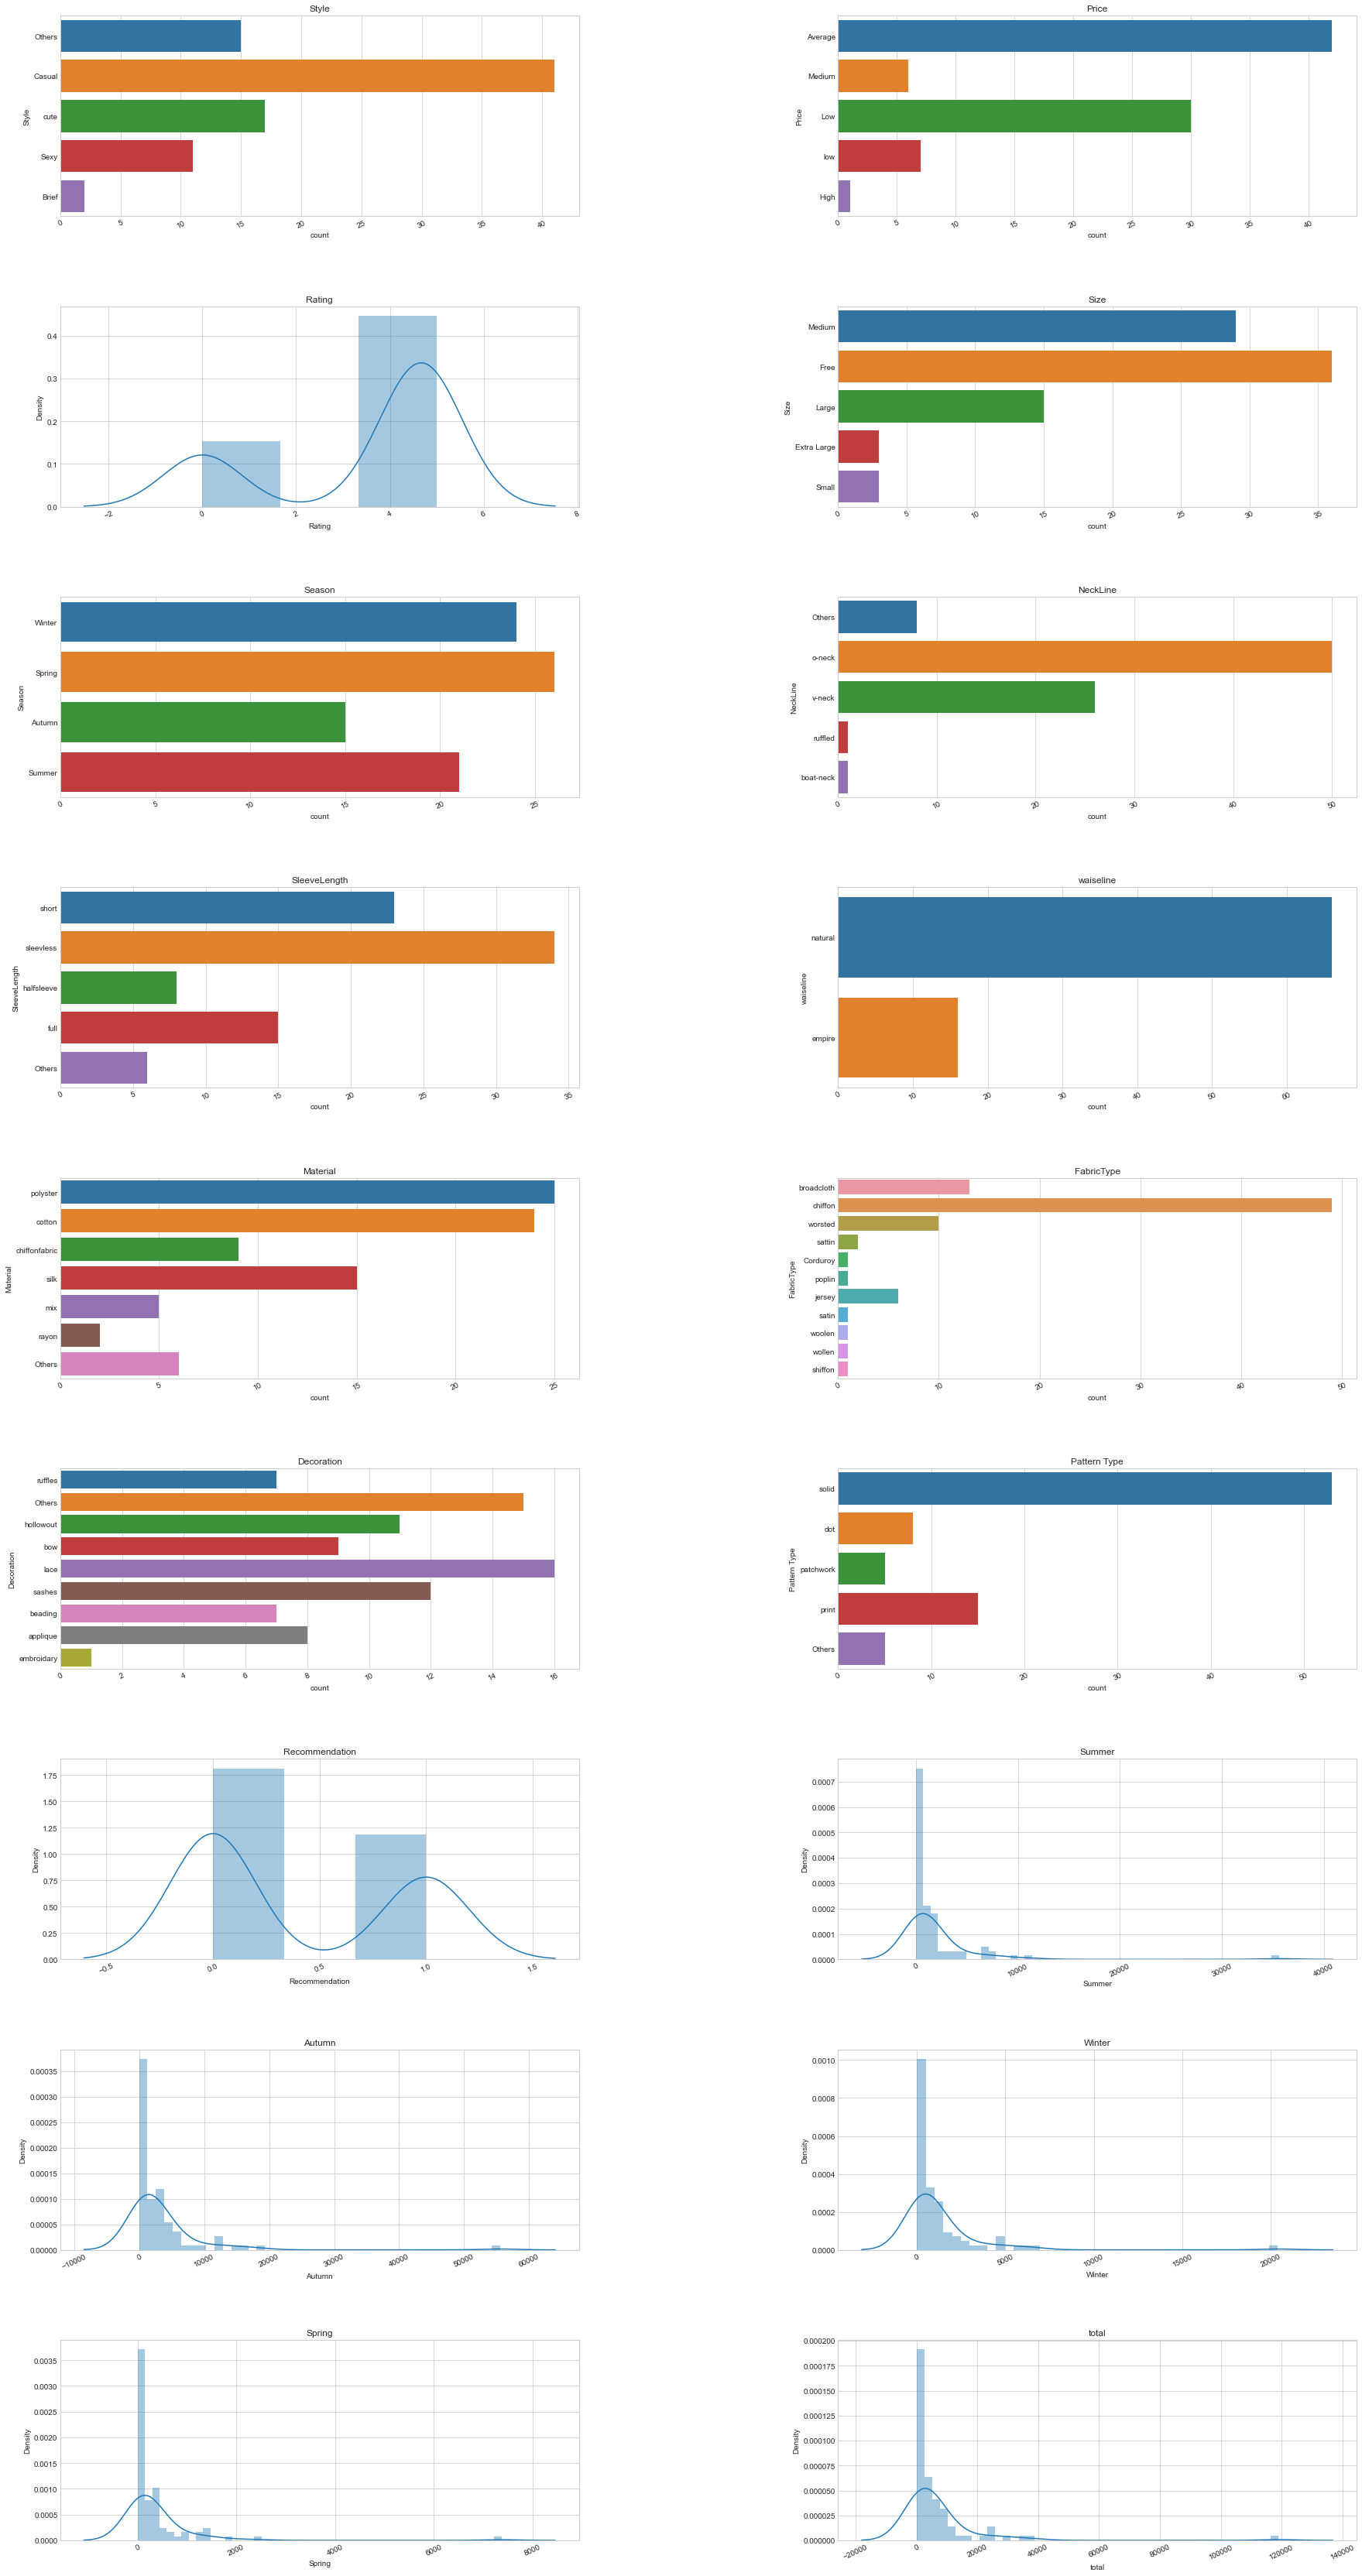

In [130]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(train,cols=2, width=30, height=60, hspace=0.45, wspace=0.5)

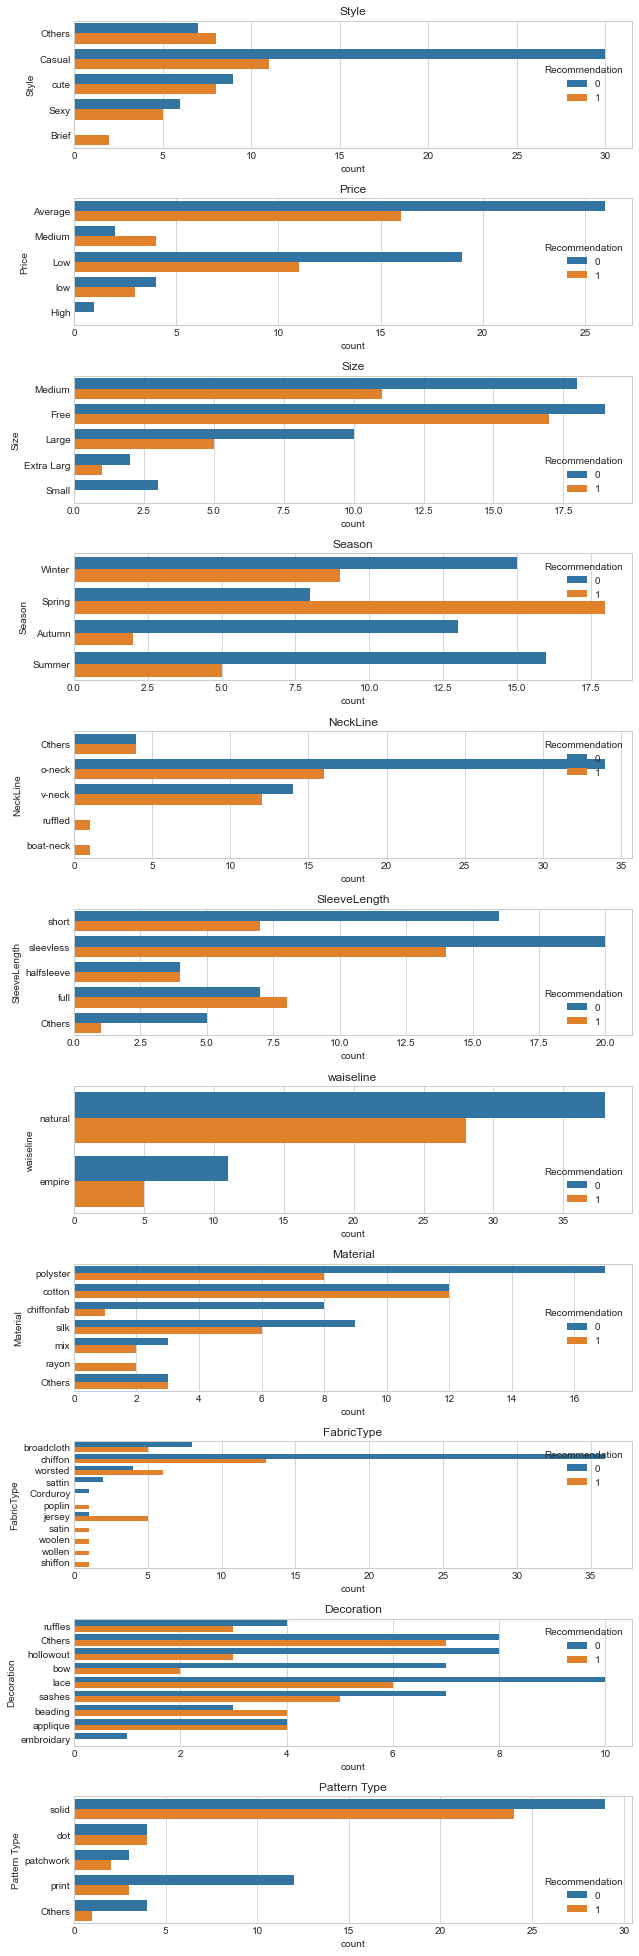

In [133]:
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
            
            
plot_bivariate_bar(train, hue=train.Recommendation, cols=1, width=10, height=35, hspace=0.4, wspace=0.5)

In [134]:
#unique value in education feature
train.Season.value_counts()

Spring    26
Winter    24
Summer    21
Autumn    15
Name: Season, dtype: int64

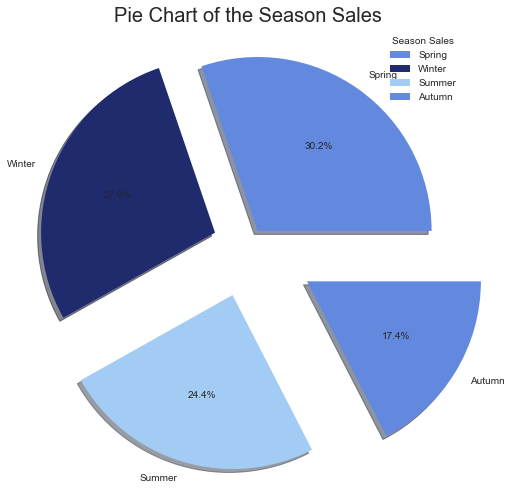

In [136]:
#plotting a pie chart
size = [26,24,21,15]
label=["Spring","Winter","Summer", 'Autumn']
color=['#6389df','#1f2b6c','#a3ccf4']
explode = [0.1, 0.2 , 0.3 , 0.4]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color,explode=explode,shadow=True,autopct="%.1f%%")
plt.title("Pie Chart of the Season Sales", fontsize = 20)
plt.axis('off')
plt.legend(title='Season Sales')
plt.show()

In [137]:
train.Price.value_counts()

Average    42
Low        30
low         7
Medium      6
High        1
Name: Price, dtype: int64

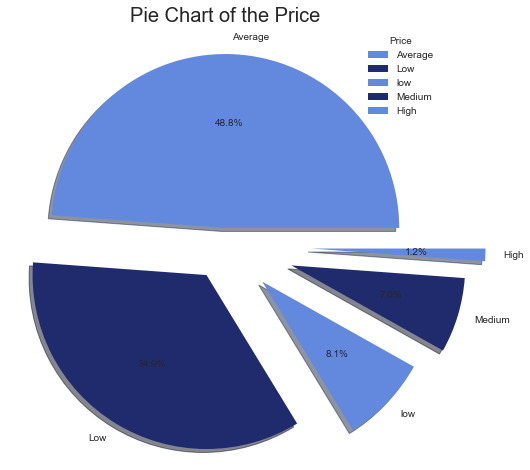

In [138]:
#plotting a pie chart
size = [42,30,7,6,1]
label=["Average","Low", "low", "Medium","High"]
color=['#6389df','#1f2b6c']
explode = [0.1, 0.2, 0.3, 0.4, 0.5 ]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color,explode=explode,shadow=True,autopct="%.1f%%")
plt.title("Pie Chart of the Price", fontsize = 20)
plt.axis('off')
plt.legend(title='Price')
plt.show()

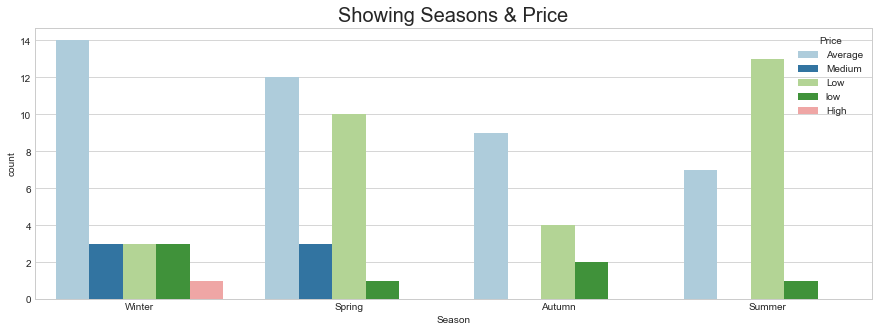

In [139]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'Season', data = train, hue = 'Price', palette = 'Paired')
plt.title('Showing Seasons & Price', fontsize = 20)
plt.show()

In [140]:
train['Pattern Type'].value_counts()

solid        53
print        15
dot           8
patchwork     5
Others        5
Name: Pattern Type, dtype: int64

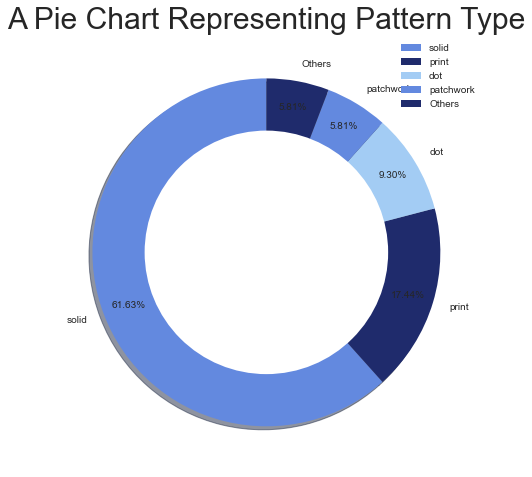

In [141]:
size=[53,15,8,5,5]
label=["solid","print","dot","patchwork",'Others']
color=['#6389df','#1f2b6c','#a3ccf4']
explode=[.05,.05,.05,0.5,0.5]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color, startangle=90,shadow=True,autopct="%.2f%%",pctdistance=.85)

center_circle=plt.Circle((0,0),.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('A Pie Chart Representing Pattern Type', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [83]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
          'SGD': SGDClassifier(),
          'LinearSVC':LinearSVC(),
          'DecisionTree': DecisionTreeClassifier(),
         'RandomForest': RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    y_train : test data (no labels)
    y_train : training labels
    y_test : test_labels
    """
    # Set random seed
    np.random.seed(42)
    
    # make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, models in models.items():
        # fit the models to the data
        models.fit(X_train, y_train)
        # evaluate the models and append its scores tp model scores
        model_scores[name] = models.score(X_test, y_test)
    return model_scores

In [84]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.6363636363636364,
 'KNN': 0.45454545454545453,
 'SGD': 0.4090909090909091,
 'LinearSVC': 0.5,
 'DecisionTree': 0.5454545454545454,
 'RandomForest': 0.6363636363636364}

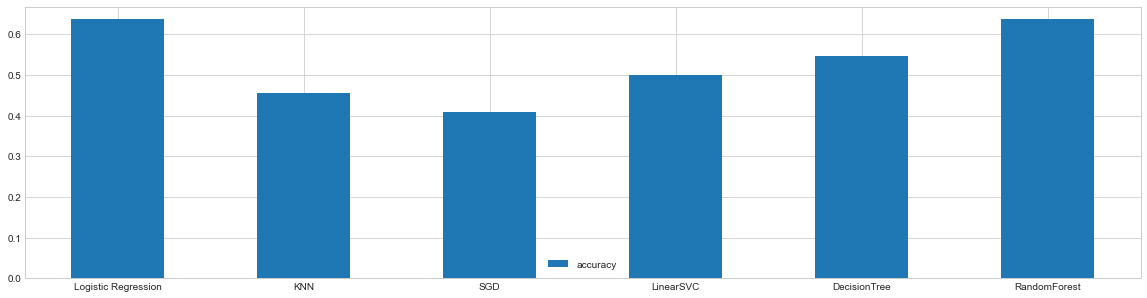

In [85]:
# Compare our models
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(rot=0, figsize=(20, 5));

In [86]:
# Lets tune KNN

train_scores = []
test_scores = []

# Create a list different value for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

#Loop thriogh different KNN neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores tist
    test_scores.append(knn.score(X_test, y_test))

In [88]:
train_scores


[1.0,
 0.9534883720930233,
 0.8255813953488372,
 0.8488372093023255,
 0.8023255813953488,
 0.8837209302325582,
 0.7790697674418605,
 0.9186046511627907,
 0.4186046511627907,
 0.5581395348837209,
 0.4069767441860465,
 0.8255813953488372,
 0.686046511627907,
 0.813953488372093,
 0.4883720930232558,
 0.7558139534883721,
 0.6744186046511628,
 0.7906976744186046,
 0.7209302325581395,
 0.7093023255813954]

In [89]:
test_scores


[0.4090909090909091,
 0.5,
 0.5454545454545454,
 0.5,
 0.45454545454545453,
 0.5,
 0.4090909090909091,
 0.4090909090909091,
 0.4090909090909091,
 0.45454545454545453,
 0.4090909090909091,
 0.5454545454545454,
 0.45454545454545453,
 0.5454545454545454,
 0.4090909090909091,
 0.5454545454545454,
 0.5,
 0.5454545454545454,
 0.5,
 0.5454545454545454]

Maximum KN score on the test data: 54.55%


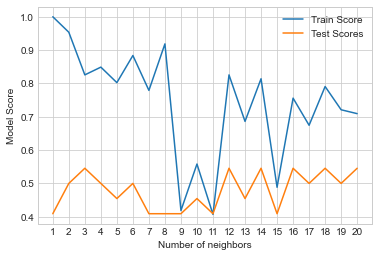

In [90]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f'Maximum KN score on the test data: {max(test_scores)*100:.2f}%')

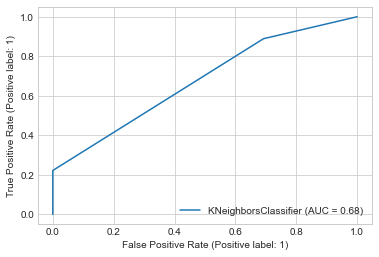

In [91]:
knn = KNeighborsClassifier(n_neighbors=14).fit(X_train, y_train)
plot_roc_curve(knn, X_test, y_test);

In [92]:
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.47      0.89      0.62         9

    accuracy                           0.55        22
   macro avg       0.64      0.60      0.53        22
weighted avg       0.67      0.55      0.51        22



In [93]:
# Linear SVC -Random Search for hyperparameters
params = {
    'C': [0.1, 1, 10, 100, 1000],   
}

svm = LinearSVC(random_state=42)
svm_random = RandomizedSearchCV(svm, cv=5, param_distributions=params, n_iter=100, verbose=2)
svm_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_iter=100,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000]},
                   verbose=2)

In [94]:
svm_random.best_params_

{'C': 0.1}

In [95]:
svm_new_score = svm_random.score(X_test, y_test)
svm_new_score

0.5

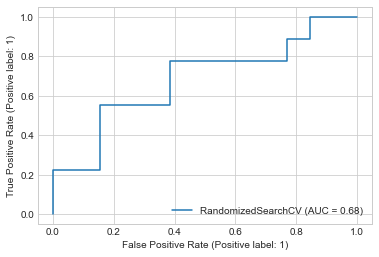

In [96]:
plot_roc_curve(svm_random, X_test, y_test)

In [97]:
print(classification_report(y_test, svm_random.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.45      1.00      0.62         9

    accuracy                           0.50        22
   macro avg       0.72      0.58      0.44        22
weighted avg       0.78      0.50      0.41        22



In [98]:
# Logistic Regression -Random Search for hyperparameters
param_dist = {'penalty': ['l2', 'l1'], 
              'class_weight': [None, 'balanced'],
              'C': np.logspace(-20, 20, 10000), 
              'intercept_scaling': np.logspace(-20, 20, 10000)}
lr = LogisticRegression(random_state=42)
random_search_lr = RandomizedSearchCV(lr, n_jobs=2, param_distributions=param_dist, n_iter=100, cv=5)
random_search_lr.fit(X_train, y_train)
print("Accuracy on test set:",random_search_lr.score(X_test, y_test))
print('Best Parameters: \n', random_search_lr.best_params_)

Accuracy on test set: 0.5909090909090909
Best Parameters: 
 {'penalty': 'l2', 'intercept_scaling': 3.315523078005517e-15, 'class_weight': None, 'C': 6.167071845170036}


In [99]:
lr_new_score = random_search_lr.score(X_test, y_test)

In [100]:
print(classification_report(y_test, random_search_lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.50      0.22      0.31         9

    accuracy                           0.59        22
   macro avg       0.56      0.53      0.51        22
weighted avg       0.57      0.59      0.55        22



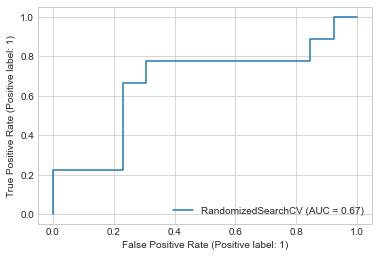

In [101]:
plot_roc_curve(random_search_lr, X_test, y_test);


In [102]:
# Random Forest Classifier -Random Search for hyperparameters
rf = RandomForestClassifier(random_state=42)
param_grid = {
              "max_depth": [None, 3, 5, 10, 15, 25],
              "max_features": [0.5, 1, 'log2', 'sqrt'],
              "min_samples_split": np.arange(2, 20, 1),
              "min_samples_leaf": np.arange(1, 11, 1),
              "bootstrap": [True, False],
              "n_estimators": np.arange(100, 1000, 50)
}

random_rf = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, n_iter=300, verbose=2)
%time
random_rf.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END bootstrap=True, max_depth=3, max_features=1, min_samples_leaf=6, min_samples_split=14, n_estimators=650; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=1, min_samples_leaf=6, min_samples_split=14, n_estimators=650; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=1, min_samples_leaf=6, min_samples_split=14, n_estimators=650; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=1, min_samples_leaf=6, min_samples_split=14, n_estimators=650; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=1, min_samples_leaf=6, min_samples_split=14, n_estimators=650; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, min_samples_leaf=1, min_samples_split=12, n_estimators=350; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, min_samples_leaf=1, min_samples_split=12,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=300,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10, 15, 25],
                                        'max_features': [0.5, 1, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [103]:
best_params_rf_random = random_rf.best_params_
best_params_rf_random

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': 3,
 'bootstrap': False}

In [104]:
# Instantiate model with best parameters from random search
rf_new = RandomForestClassifier(n_estimators=550,
                                min_samples_leaf=5,
                                min_samples_split=14,
                                max_features=0.5,
                                max_depth=3, bootstrap=False)
rf_new.fit(X_train, y_train)
rf_new.score(X_test, y_test)

0.45454545454545453

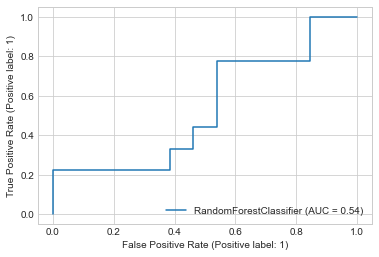

In [105]:
#plot roc curve with the random search model
plot_roc_curve(rf_new, X_test, y_test)

In [106]:
# Random Forest Classifier -Random Search for hyperparameters
rf = RandomForestClassifier(random_state=42)
grid = {
    'n_estimators': np.arange(200, 1000, 100),
    'bootstrap':[True, False],
    'max_depth' : [3, 5, 10, 15, 25]
}
rf_grid =GridSearchCV(rf, grid, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ......bootstrap=True, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ......bootstrap=True, max_depth=3, n_estimators=400; total time=   0.3s
[CV] END ......bootstrap=True, max_depth=3, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 10, 15, 25],
                         'n_estimators': array([200, 300, 400, 500, 600, 700, 800, 900])},
             verbose=2)

In [107]:
rf_grid.best_params_

{'bootstrap': False, 'max_depth': 10, 'n_estimators': 400}

In [108]:
# Check our grid search tuned model scores
rf_grid.score(X_test, y_test)

0.6363636363636364

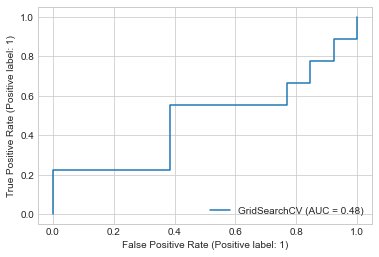

In [109]:
# Plot ROC curve
plot_roc_curve(rf_grid, X_test, y_test)

In [110]:
# Furthur manual tuning
rf_grid = RandomForestClassifier(bootstrap=True, n_estimators=900, max_depth=5, max_features=0.5,
                                 min_samples_leaf=15)
rf_grid.fit(X_train, y_train)
rf_grid.score(X_test, y_test)

0.5909090909090909

In [111]:
rf_new_score = rf_grid.score(X_test, y_test)


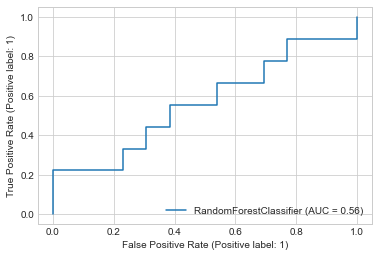

In [112]:
# Plot ROC curve
plot_roc_curve(rf_grid, X_test, y_test)

In [113]:
print(classification_report(y_test, rf_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.50      0.22      0.31         9

    accuracy                           0.59        22
   macro avg       0.56      0.53      0.51        22
weighted avg       0.57      0.59      0.55        22



In [114]:
model_scores

{'Logistic Regression': 0.6363636363636364,
 'KNN': 0.45454545454545453,
 'SGD': 0.4090909090909091,
 'LinearSVC': 0.5,
 'DecisionTree': 0.5454545454545454,
 'RandomForest': 0.6363636363636364}

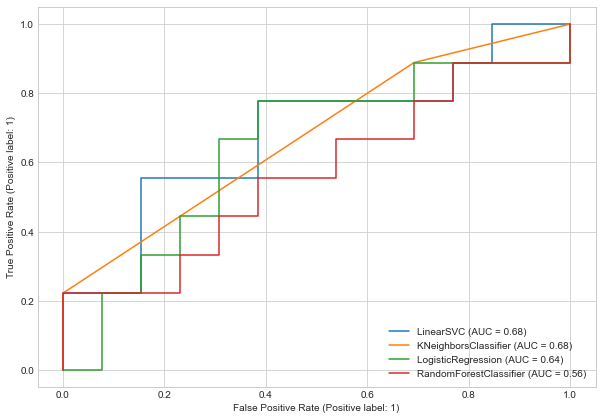

In [115]:
# Compare roc Curves
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
s = plot_roc_curve(LinearSVC(random_state=42, C=0.1).fit(X_train, y_train), X_test, y_test, ax=ax)

k = plot_roc_curve(knn, X_test, y_test, ax=ax)

l = plot_roc_curve(LogisticRegression(penalty='l2', intercept_scaling=5.9659219556494824e+16,
                                     class_weight='balanced', C=0.00761707407061047, random_state=42).fit(X_train, y_train),
                   X_test, y_test, ax=ax)

r = plot_roc_curve(rf_grid, X_test, y_test, ax=ax)

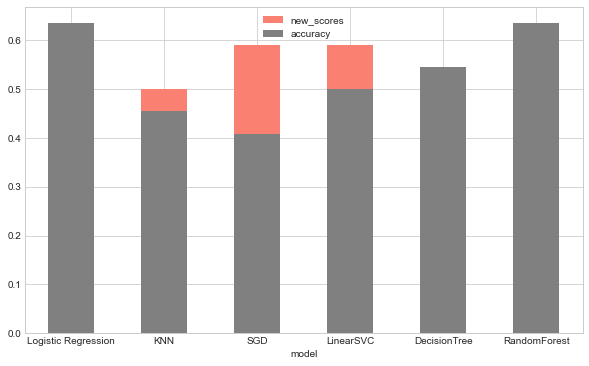

In [116]:
# Compare scores after tuning
estimators = ["KNN","Linear SVM", "Logistic Regression", "Random Forest Classifier"]
new_scores = [knn.score(X_test, y_test), svm_new_score, lr_new_score, rf_grid.score(X_test, y_test)]
scores_new_df = pd.DataFrame()
scores_new_df['model'] = estimators
scores_new_df['new_scores'] = new_scores

fig, ax = plt.subplots()
scores_new_df.plot(x='model', y='new_scores', kind="bar", rot=0, figsize=(10,6), ax=ax, color='salmon')
model_compare.T.plot.bar(rot=0, ax=ax, color='gray', label='old_scores');

In [1]:
from sklearn.ensemble          import RandomForestClassifier
from sklearn.tree              import DecisionTreeClassifier

from sklearn.metrics           import accuracy_score
from sklearn.metrics           import classification_report
from sklearn.metrics           import confusion_matrix

from sklearn.model_selection   import RandomizedSearchCV
from sklearn.model_selection   import KFold,cross_val_score

In [3]:
rs=1331 ##random_state


In [8]:
from imblearn.combine import SMOTETomek
def oversample(X,Y):
    over_sample = SMOTETomek(random_state=rs)
    X_over,Y_over = over_sample.fit_resample(X,Y)
    return X_over,Y_over

In [13]:
train.info()


NameError: name 'train' is not defined